4(a).  add some Gaussian Noise & apply 4th order Butterworth & Gaussian Low Pass Filter to analyze their performance quantitatively

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function for Butterworth Low Pass Filter

In [4]:
def apply_butterworth_filter(image, order, cutoff_frequency):
    height, width = image.shape
    butterworth_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            butterworth_filter[u, v] = 1 / (1 + (D / cutoff_frequency)**(2 * order))

    filtered_image = image * butterworth_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    return np.abs(filtered_image)

### Function for Gaussian Low Pass Filter

In [5]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    return np.abs(filtered_image)

loading the image

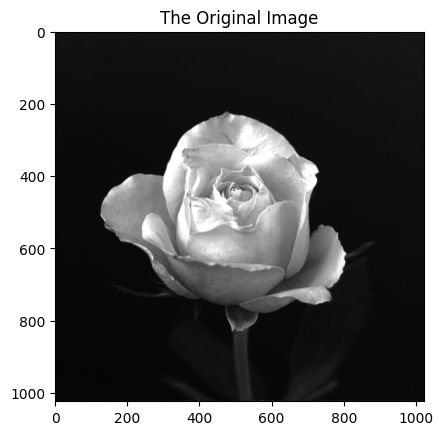

In [8]:
character_pattern_image = cv2.imread("./Rose 1024x1024.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Original Image")
plt.show()

### Adding Gaussian Noise

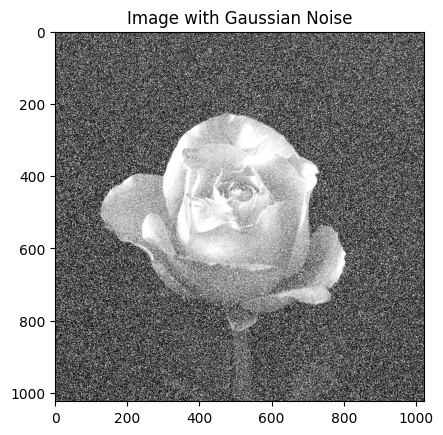

In [9]:
gaussian_noise = np.random.normal(7, 13, character_pattern_image.shape).astype(np.uint8)
noisy_character_image = cv2.add(character_pattern_image, gaussian_noise)
plt.imshow(cv2.cvtColor(noisy_character_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Gaussian Noise")
plt.show()

### Applying FFT (Fast Fourier Transform)

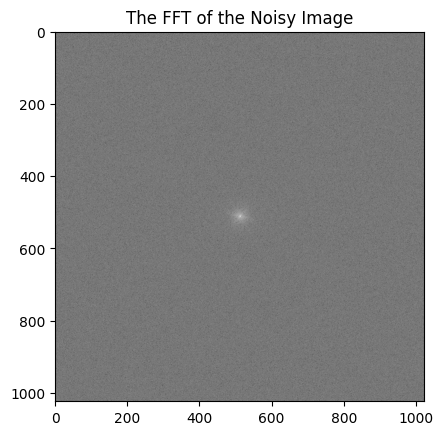

In [10]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_character_image))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap = "gray")
plt.title("The FFT of the Noisy Image")
plt.show()

### Applying Butterworth Filter

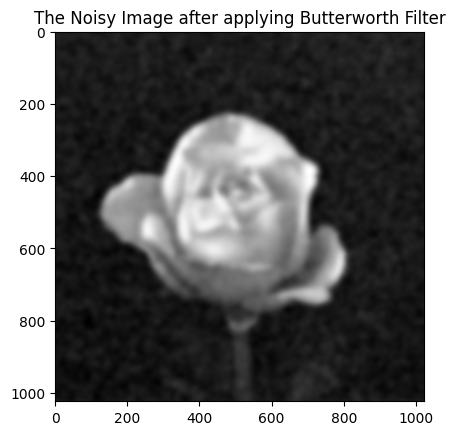

In [11]:
order, radius = 2, 25
butterworth_filtered_image = apply_butterworth_filter(noisy_image_fft, order, radius)
plt.imshow(butterworth_filtered_image, cmap = "gray")
plt.title("The Noisy Image after applying Butterworth Filter")
plt.show()

### Applying Gaussian Low Pass Filter

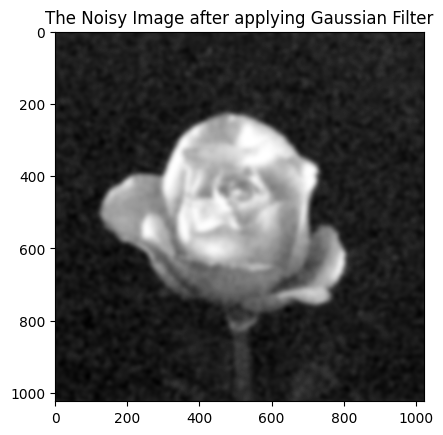

In [12]:
radius = 25
gaussian_filtered_image = apply_gaussian_filter(noisy_image_fft, radius)
plt.imshow(gaussian_filtered_image, cmap = "gray")
plt.title("The Noisy Image after applying Gaussian Filter")
plt.show()

4(b).  add some Gaussian Noise & observe the Ringing Effect of Ideal Low Pass Filter on the image. Use different radius of Ideal Low Pass Filter & display their results

### Function for Ideal Low Pass Filter

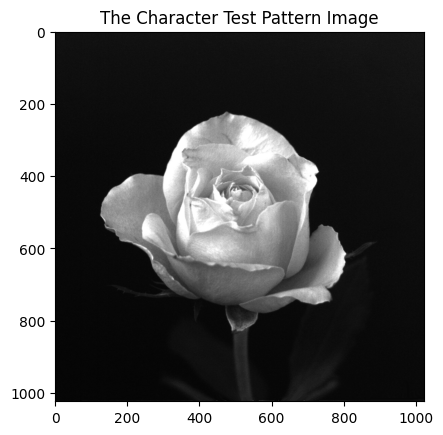

In [14]:
character_pattern_image = cv2.imread("./Rose 1024x1024.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

def apply_ideal_low_pass_filter(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D <= cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

then add gausian noise
then apply fft

then apply ideal low pass filter of varous radious or cutoff frequecy

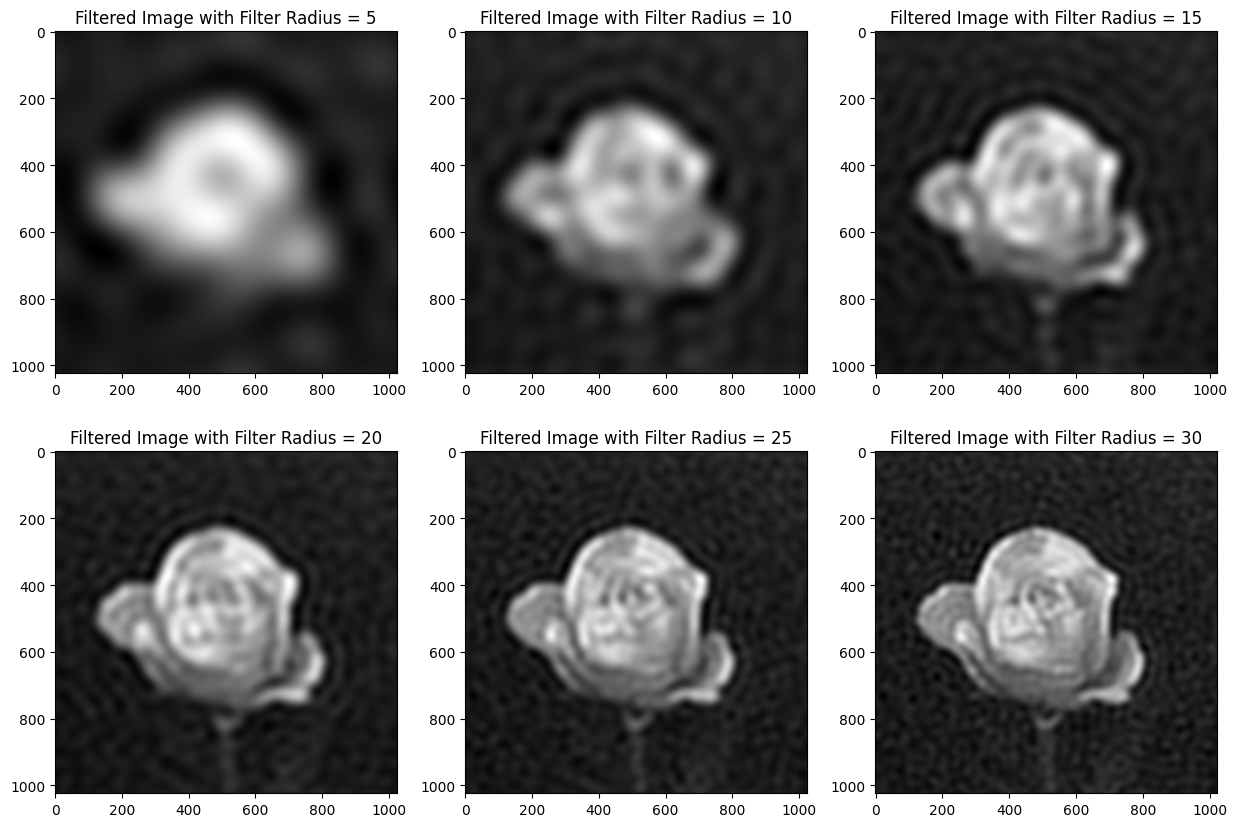

In [15]:
gaussian_noise = np.random.normal(7, 13, character_pattern_image.shape).astype(np.uint8)
noisy_character_image = cv2.add(character_pattern_image, gaussian_noise)
character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(noisy_character_image))

plt.figure(figsize = (15, 10))

for r in range(1, 7):
    filtered_image = apply_ideal_low_pass_filter(character_pattern_image_fft, r * 5)
    plt.subplot(2, 3, r)
    plt.imshow(filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {r * 5}")

plt.show()

4(c).  perform edge detection of given the noise & clean image using Ideal & Gaussian High Pass Filters

function for ideal high pass filter

In [16]:
def apply_ideal_high_pass_filter(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D > cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

### Function for Gaussian High Pass Filter

In [17]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = 1 - np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

load image andd apply fft

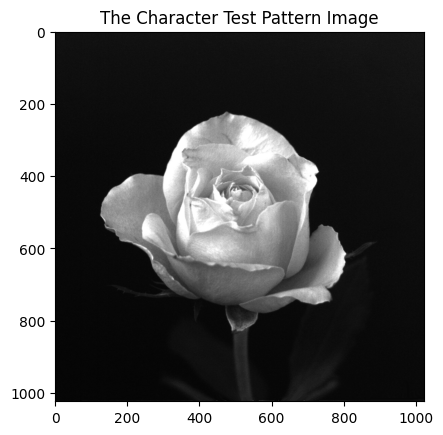

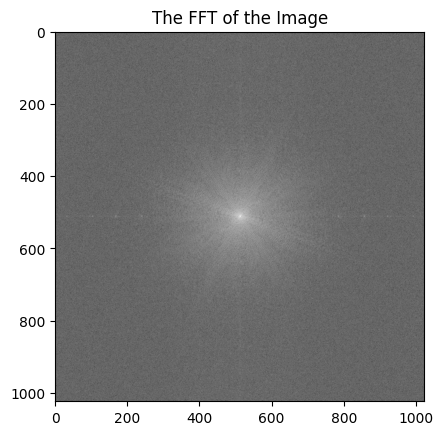

In [18]:
character_pattern_image = cv2.imread("./Rose 1024x1024.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(character_pattern_image))
plt.imshow(np.log(np.abs(character_pattern_image_fft)), cmap = "gray")
plt.title("The FFT of the Image")
plt.show()

### Applying Ideal High Pass Filter for Edge Detection

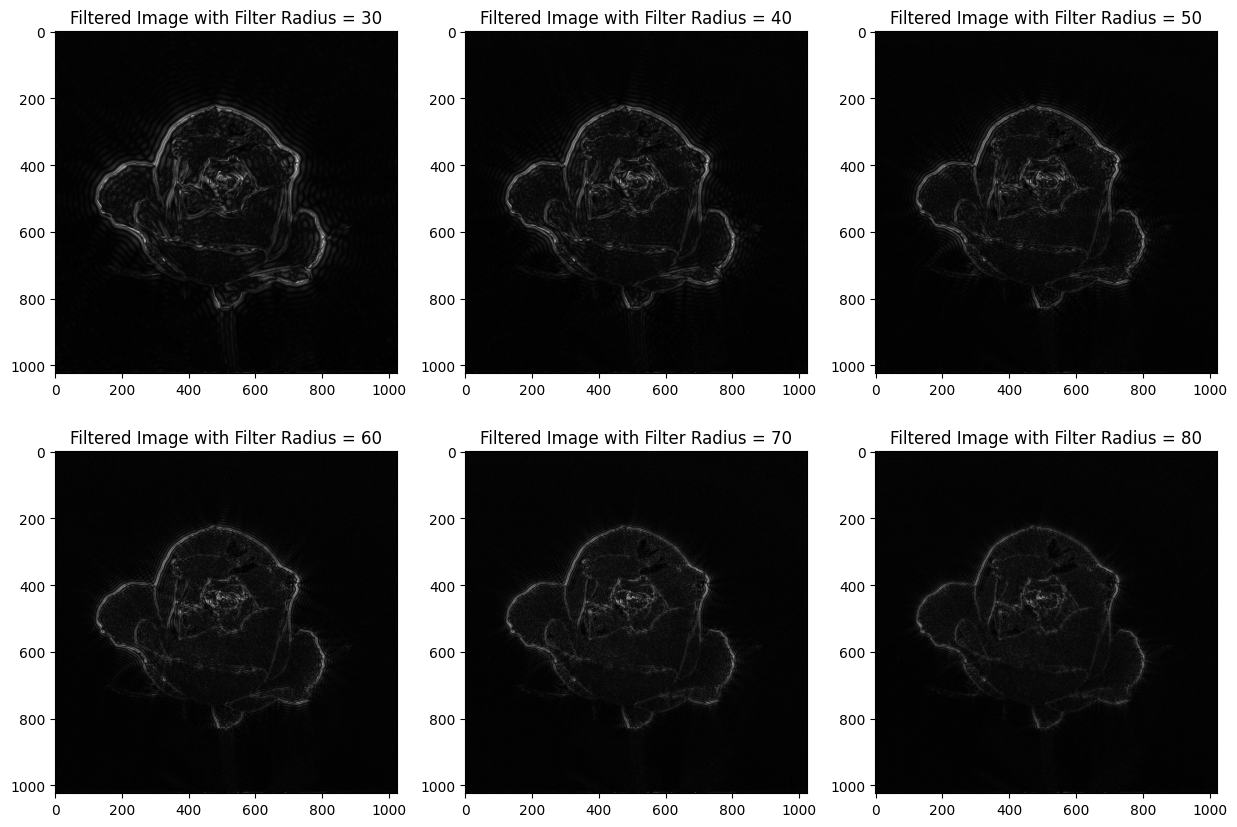

In [19]:
radius = 30
plt.figure(figsize = (15, 10))

for k in range(1, 7):
    ideal_filtered_image = apply_ideal_high_pass_filter(character_pattern_image_fft, radius)
    plt.subplot(2, 3, k)
    plt.imshow(ideal_filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()

### Applying Gaussian High Pass Filter for Edge Detection

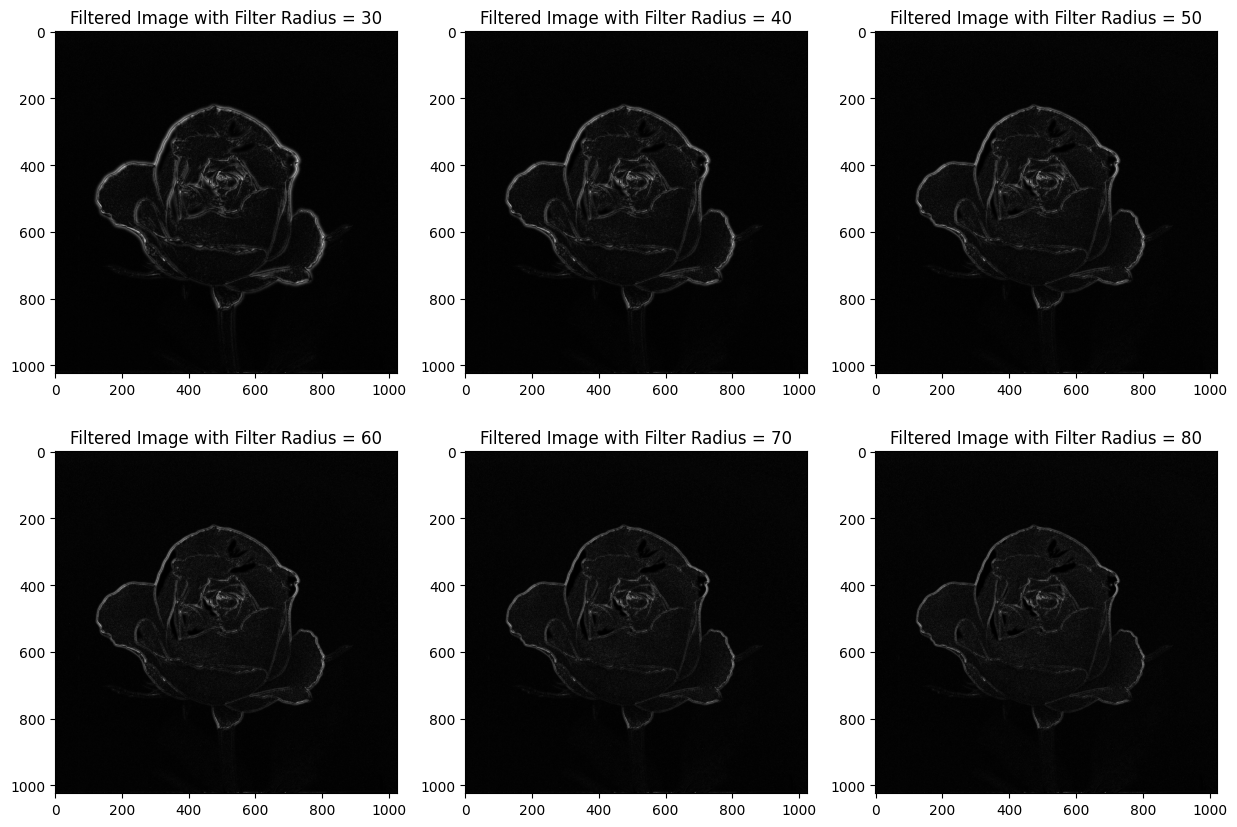

In [20]:
radius = 30
plt.figure(figsize = (15, 10))

for k in range(1, 7):
    gaussian_filtered_image = apply_gaussian_filter(character_pattern_image_fft, radius)
    plt.subplot(2, 3, k)
    plt.imshow(gaussian_filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()